# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.cm as cm

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

##### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_section = "appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(base_url + query_section + "&q=" + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | remire-montjoly
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | lerwick
Processing Record 9 of Set 1 | pechora
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | callao
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | crane
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | ciud

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

#### milestone - read csv data

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,298.35,78,5,4.61,PN,1682458290
1,isafjordur,66.0755,-23.1240,272.08,58,7,2.83,IS,1682458184
2,puerto ayora,-0.7393,-90.3518,302.13,88,31,2.68,EC,1682458291
3,remire-montjoly,4.9167,-52.2667,299.17,89,75,1.54,GF,1682458202
4,longyearbyen,78.2186,15.6401,266.06,79,0,1.54,SJ,1682458292


## Create the Scatter Plots Requested

#### Latitude Vs. Temperature

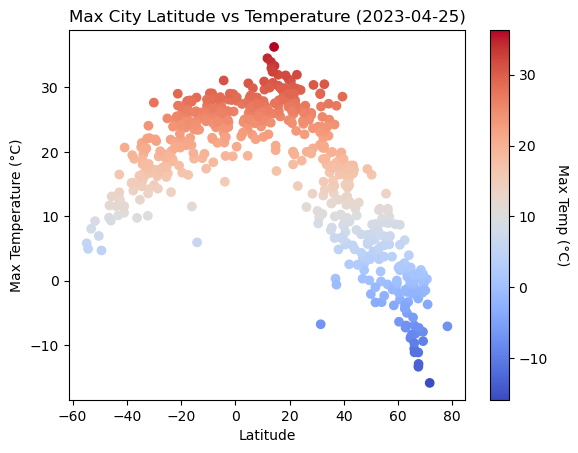

In [3]:
# create a color map for the temperature values

# converting kelvin to celcius 
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

colormap = plt.colormaps['coolwarm']
normalize = plt.Normalize(city_data_df['Max Temp'].min(), city_data_df['Max Temp'].max())

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c=city_data_df['Max Temp'], cmap=colormap, norm=normalize)


# Incorporate the other graph properties
cbar = plt.colorbar()
cbar.ax.set_ylabel('Max Temp (°C)', rotation=270, labelpad=15)

start_date = pd.Timestamp(city_data_df['Date'].min(), unit='s').strftime('%Y-%m-%d')
end_date = pd.Timestamp(city_data_df['Date'].max(), unit='s').strftime('%Y-%m-%d')
if start_date == end_date:
    plt.title(f'Max City Latitude vs Temperature ({start_date})')
else:
    plt.title(f'Max City Latitude vs Temperature ({start_date} to {end_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

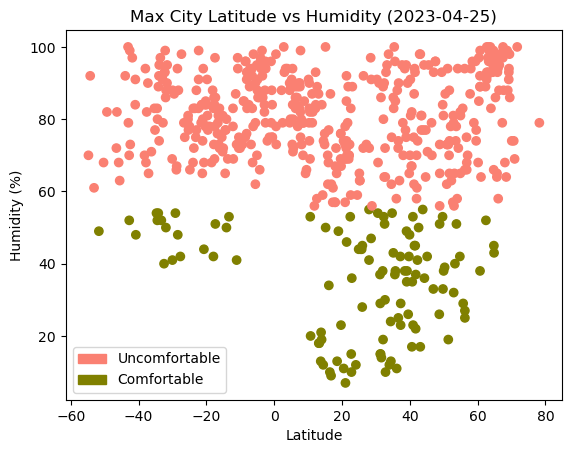

In [29]:
# Build the scatter plots for latitude vs. humidity

# classify humidity into comfortable and uncomfortable categories
humid_bins = [0, 55, 100]
humid_labels = ['Comfortable', 'Uncomfortable']
city_data_df['Humidity Category'] = pd.cut(city_data_df['Humidity'],\
                                            bins=humid_bins,\
                                            labels=humid_labels,\
                                            include_lowest=True,\
                                            ordered=False)

# create a color map for the humidity categories
humid_colors = {'Comfortable': 'olive', 'Uncomfortable': 'salmon'}
city_data_df['Humidity Color'] = city_data_df['Humidity Category'].map(humid_colors)

# Incorporate the other graph properties

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c=city_data_df['Humidity Color'])

handles=[plt.Circle((0, 0), 1, color='olive'), plt.Circle((0, 0), 1, color='salmon')]
labels=['Comfortable', 'Uncomfortable']

# add a legend and set the axis labels
plt.legend(handles[::-1],labels[::-1])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Max City Latitude vs Humidity Percentage')

start_date = pd.Timestamp(city_data_df['Date'].min(), unit='s').strftime('%Y-%m-%d')
end_date = pd.Timestamp(city_data_df['Date'].max(), unit='s').strftime('%Y-%m-%d')
if start_date == end_date:
    plt.title(f'Max City Latitude vs Humidity ({start_date})')
else:
    plt.title(f'Max City Latitude vs Humidity ({start_date} to {end_date})')

# Save the figure
plt.savefig("output_data/Fig2.png")
plt.show()

Humidity Category Source 
> https://www.weather.gov/arx/why_dewpoint_vs_humidity

#### Latitude Vs. Cloudiness

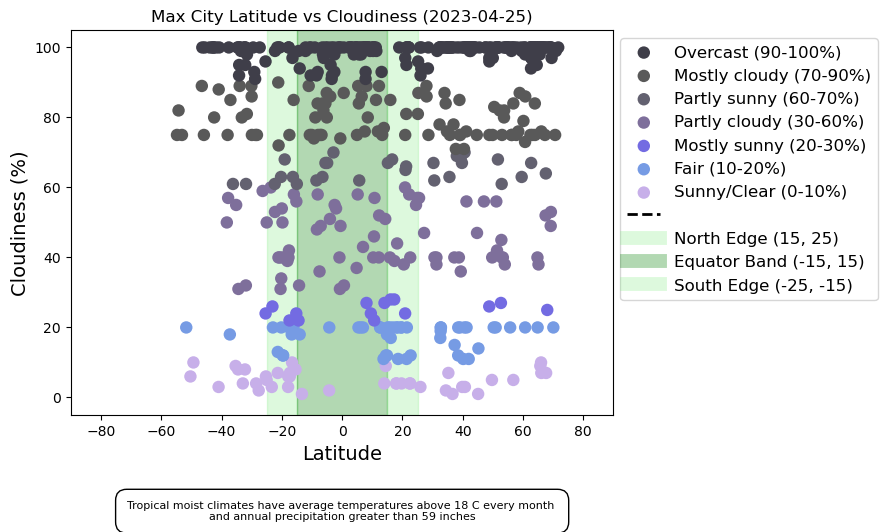

In [5]:
# Build the scatter plots for latitude vs. cloudiness

# Define cloud coverage bins
bins = [0, 10, 20, 30, 60, 70, 90, 100]
labels = ["Sunny/Clear", "Fair", "Mostly sunny", "Partly cloudy", "Partly sunny", "Mostly cloudy", "Overcast"]
city_data_df['Cloudiness Category'] = pd.cut(city_data_df['Cloudiness'], bins=bins, labels=labels)

# Define the tropical moist climates bands
south_edge = (-25, -15)
equator_band = (-15, 15)
north_edge = (15, 25)

# Define figure and axis objects
fig, ax = plt.subplots(figsize=(7, 5), sharey=True)

# Add tropical moist climates bands
south_span = ax.axvspan(south_edge[0], south_edge[1], color='lightgreen', alpha=0.3)
equator_span = ax.axvspan(equator_band[0], equator_band[1], color='green', alpha=0.3)
north_span = ax.axvspan(north_edge[0], north_edge[1], color='lightgreen', alpha=0.3)

# Define the colors for each label
colors = ['#c7afe9', '#769be4', '#736be2', '#7e6f9b', '#636170', '#595959', '#3f3e49']

# Plot scatter plot with color-coded cloudiness categories
for label in labels:
    subset = city_data_df[city_data_df['Cloudiness Category'] == label]
    color = colors[labels.index(label)]
    ax.scatter(subset['Lat'], subset['Cloudiness'], 
               c=color, s=80, edgecolors='none', label=label)

# Incorporate the other graph properties

# Set x and y limits and labels
ax.set_xlim(-90, 90)
ax.set_ylim(-5, 105)
ax.set_xlabel('Latitude', fontsize=14)
ax.set_ylabel('Cloudiness (%)', fontsize=14)

# Define the custom handles and labels for the legend
cloud_handles = [plt.scatter([], [], s=80, c=colors[i], edgecolors='none') for i in range(len(labels))]
cloud_labels = [f'{category} ({bins[i]}-{bins[i+1]}%)' for i, category in enumerate(labels)]

# Append information regarding the tropical climate bands
tropical_handles = []
tropical_labels = ['North Edge (15, 25)']
tropical_handles.append(plt.Line2D([0], [0], color='lightgreen', lw=10, alpha=0.3))
tropical_labels.append('Equator Band (-15, 15)') 
tropical_handles.append(plt.Line2D([0], [0], color='green', lw=10, alpha=0.3))
tropical_labels.append('South Edge (-25, -15)')
tropical_handles.append(plt.Line2D([0], [0], color='lightgreen', lw=10, alpha=0.3))


# Combine the two sets of handles and labels and add a horizontal line as a separator
handles = cloud_handles[::-1] + [plt.Line2D([0], [0], color='k', lw=2, linestyle='--')] + tropical_handles
labels = cloud_labels[::-1] + [''] + tropical_labels

# Add legend
ax.legend(handles, labels, fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 1))

# Add note box
note_text = "Tropical moist climates have average temperatures above 18 C every month \nand annual precipitation greater than 59 inches"
ax.text(0.5, -0.25, note_text, transform=ax.transAxes, fontsize=8, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

# Add title
start_date = pd.Timestamp(city_data_df['Date'].min(), unit='s').strftime('%Y-%m-%d')
end_date = pd.Timestamp(city_data_df['Date'].max(), unit='s').strftime('%Y-%m-%d')
if start_date == end_date:
    plt.title(f'Max City Latitude vs Cloudiness ({start_date})')
else:
    plt.title(f'Max City Latitude vs Cloudiness ({start_date} to {end_date})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Cloudiness Category Source
> https://www.weather.gov/jetstream/climates 

#### Latitude vs. Wind Speed Plot

In [6]:
windspeed = [0, 1.5, 3, 5, 8, 10.5, 13.5, 16.5, 20,23.5,27.5,31.5]
winddescrip = ['Calm', 'Light air', 'Light breeze', 'Gentle breeze', 'Moderate breeze',
                    'Fresh breeze', 'Strong breeze', 'Moderate gale', 'Fresh Gale', 'Strong gale',
                    'Whole gale', 'Storm']
windeffect = ['Smoke rises vertically',
              'Smoke drifts with air, weather vanes inactive',
                       'Weather vanes active, wind felt on face, leaves rustle',
                       'Leaves & small twigs move, light flags extend',
                       'Small branches sway, dust & loose paper blows about',
                       'Small trees sway, waves break on inland waters',
                       'Large branches sway, umbrellas difficult to use',
                       'Whole trees sway, difficult to walk against wind',
                       'Twigs broken off trees, walking against wind very difficult',
                       'Slight damage to buildings, shingles blown off roof',
                       'Trees uprooted, considerable damage to buildings',
                       'Widespread damage, very rare occurrence']

In [7]:
beaufortwindscale = pd.DataFrame({
    'Wind speed (m/s)': windspeed,
    'Wind Category': winddescrip,
    'Physical Effect': windeffect
})
beaufortwindscale

,Wind speed (m/s),Wind Category,Physical Effect
0,0.0,Calm,Smoke rises vertically
1,1.5,Light air,"Smoke drifts with air, weather vanes inactive"
2,3.0,Light breeze,"Weather vanes active, wind felt on face, leave..."
3,5.0,Gentle breeze,"Leaves & small twigs move, light flags extend"
4,8.0,Moderate breeze,"Small branches sway, dust & loose paper blows ..."
5,10.5,Fresh breeze,"Small trees sway, waves break on inland waters"
6,13.5,Strong breeze,"Large branches sway, umbrellas difficult to use"
7,16.5,Moderate gale,"Whole trees sway, difficult to walk against wind"
8,20.0,Fresh Gale,"Twigs broken off trees, walking against wind v..."
9,23.5,Strong gale,"Slight damage to buildings, shingles blown off..."


Wind Speed Category Source 
> http://gyre.umeoce.maine.edu/data/gomoos/buoy/php/variable_description.php?variable=wind_2_speed 

In [11]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Humidity Category,Humidity Color,Cloudiness Category
City_ID,,,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.20,78,5,4.61,PN,1682458290,Uncomfortable,salmon,Sunny/Clear
1,isafjordur,66.0755,-23.1240,-1.07,58,7,2.83,IS,1682458184,Uncomfortable,salmon,Sunny/Clear
2,puerto ayora,-0.7393,-90.3518,28.98,88,31,2.68,EC,1682458291,Uncomfortable,salmon,Partly cloudy
3,remire-montjoly,4.9167,-52.2667,26.02,89,75,1.54,GF,1682458202,Uncomfortable,salmon,Mostly cloudy
4,longyearbyen,78.2186,15.6401,-7.09,79,0,1.54,SJ,1682458292,Uncomfortable,salmon,NaN


In [25]:
wind_bins = [0,0.5,1.5, 3, 5,8, 10.5, 13.5, 16.5, 20,23.5,27.5,31.5]
labels = beaufortwindscale['Wind Category']

In [26]:
# Categorize the wind speeds using the Beaufort scale
city_data_df['Wind Category'] = pd.cut(city_data_df['Wind Speed'], bins=wind_bins, labels=labels)

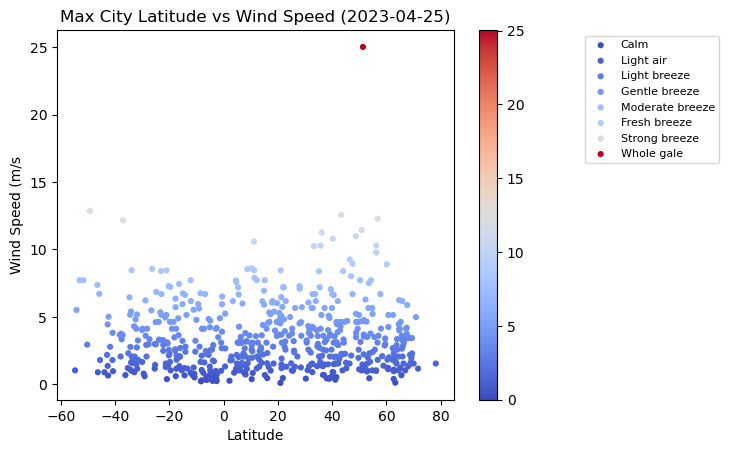

In [27]:
# Build the scatter plots for latitude vs. wind speed
colormap_wind = plt.colormaps['coolwarm']

# Create a dictionary mapping wind categories to corresponding wind speeds
wind_speeds = {}
for label in labels:
    subset = city_data_df[city_data_df['Wind Category'] == label]
    if not subset.empty:
        wind_speeds[label] = subset['Wind Speed']

# Plot scatter plot with color-coded wind categories
for label, speeds in wind_speeds.items():
    subset = city_data_df[city_data_df['Wind Category'] == label]
    plt.scatter(subset['Lat'], subset['Wind Speed'], 
                s=20, edgecolors='none', label=label, cmap=colormap_wind, 
                c=subset['Wind Speed'], vmin=min(city_data_df['Wind Speed']), 
                vmax=max(city_data_df['Wind Speed']))
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s")

start_date = pd.Timestamp(city_data_df['Date'].min(), unit='s').strftime('%Y-%m-%d')
end_date = pd.Timestamp(city_data_df['Date'].max(), unit='s').strftime('%Y-%m-%d')
if start_date == end_date:
    plt.title(f'Max City Latitude vs Wind Speed ({start_date})')
else:
    plt.title(f'Max City Latitude vs Wind Speed ({start_date} to {end_date})')

# Create a ScalarMappable object to map wind speeds to colors
sc = cm.ScalarMappable(cmap=colormap_wind)
sc.set_array(city_data_df['Wind Speed'])

# Add a colorbar
sc = plt.scatter([],[], c=[], vmin=min(city_data_df['Wind Speed']), vmax=max(city_data_df['Wind Speed']), cmap=colormap_wind)
plt.colorbar(sc)
cbar.set_label('Wind Speed (m/s)')

# Add legend for wind speeds with recorded data
legend_labels = [label for label, speeds in wind_speeds.items() if len(speeds) > 0]
plt.legend((legend_labels), loc='upper center', fontsize=8, bbox_to_anchor=(1.5, 1))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [31]:
city_data_df['Cloudiness Category'].fillna('Sunny/Clear', inplace=True)
city_data_df = city_data_df.drop(columns=['Humidity Color'])

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Humidity Category,Cloudiness Category,Wind Category
City_ID,,,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.20,78,5,4.61,PN,1682458290,Uncomfortable,Sunny/Clear,Gentle breeze
1,isafjordur,66.0755,-23.1240,-1.07,58,7,2.83,IS,1682458184,Uncomfortable,Sunny/Clear,Light breeze
2,puerto ayora,-0.7393,-90.3518,28.98,88,31,2.68,EC,1682458291,Uncomfortable,Partly cloudy,Light breeze
3,remire-montjoly,4.9167,-52.2667,26.02,89,75,1.54,GF,1682458202,Uncomfortable,Mostly cloudy,Light breeze
4,longyearbyen,78.2186,15.6401,-7.09,79,0,1.54,SJ,1682458292,Uncomfortable,Sunny/Clear,Light breeze


---

## Requirement 2: Compute Linear Regression for Each Relationship

    It should be noted that these observations are from the particular data set of random lat/lon pulled for this exercise. 



In [201]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, title, xlabel, ylabel):
    # Calculate linear regression values
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = f"R\u00b2 = {round(rvalue**2, 2)}"

    # Create scatter plot with linear regression line
    plt.scatter(x, y, s=20)
    plt.plot(x, regress_values, "r-", linewidth=1)

    # Add regression line equation and r-squared value
    plt.annotate(line_eq, (0.99999, 0.9), xycoords="axes fraction", fontsize=12, color="red")
    plt.annotate(r_squared, (0.99999, 0.8), xycoords="axes fraction", fontsize=12, color="red")

    # Add chart labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()

In [182]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Humidity Category,Cloudiness Category,Wind Category
City_ID,,,,,,,,,,,,
1,isafjordur,66.0755,-23.1240,-1.07,58,7,2.83,IS,1682458184,Uncomfortable,Sunny/Clear,Light breeze
3,remire-montjoly,4.9167,-52.2667,26.02,89,75,1.54,GF,1682458202,Uncomfortable,Mostly cloudy,Light breeze
4,longyearbyen,78.2186,15.6401,-7.09,79,0,1.54,SJ,1682458292,Uncomfortable,Sunny/Clear,Light breeze
5,lerwick,60.1545,-1.1494,2.00,68,79,8.90,GB,1682458292,Uncomfortable,Mostly cloudy,Fresh breeze
6,pechora,65.1472,57.2244,-8.34,98,38,1.22,RU,1682458293,Uncomfortable,Partly cloudy,Light air


In [184]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Humidity Category,Cloudiness Category,Wind Category
City_ID,,,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.20,78,5,4.61,PN,1682458290,Uncomfortable,Sunny/Clear,Gentle breeze
2,puerto ayora,-0.7393,-90.3518,28.98,88,31,2.68,EC,1682458291,Uncomfortable,Partly cloudy,Light breeze
7,papatowai,-46.5619,169.4708,9.79,72,89,7.37,NZ,1682458293,Uncomfortable,Mostly cloudy,Moderate breeze
8,punta arenas,-53.1500,-70.9167,8.06,61,75,7.72,CL,1682458168,Uncomfortable,Mostly cloudy,Moderate breeze
9,callao,-12.0667,-77.1500,26.16,69,0,6.17,PE,1682458143,Uncomfortable,Sunny/Clear,Moderate breeze


###  Temperature vs. Latitude Linear Regression Plot

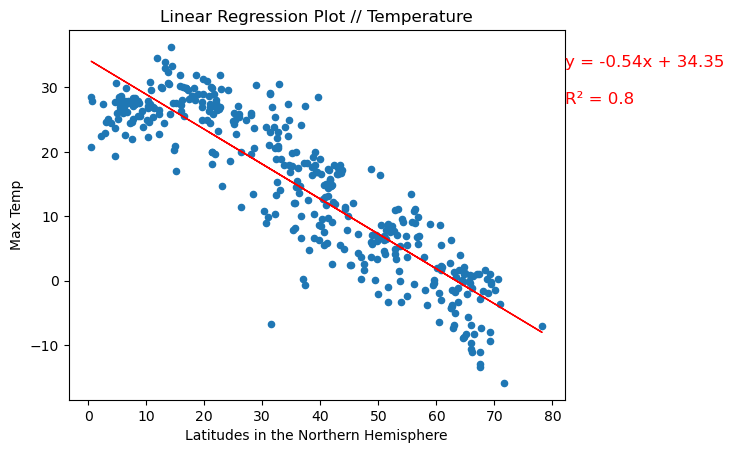

In [213]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Linear Regression Plot // Temperature', 'Latitudes in the Northern Hemisphere', 'Max Temp')


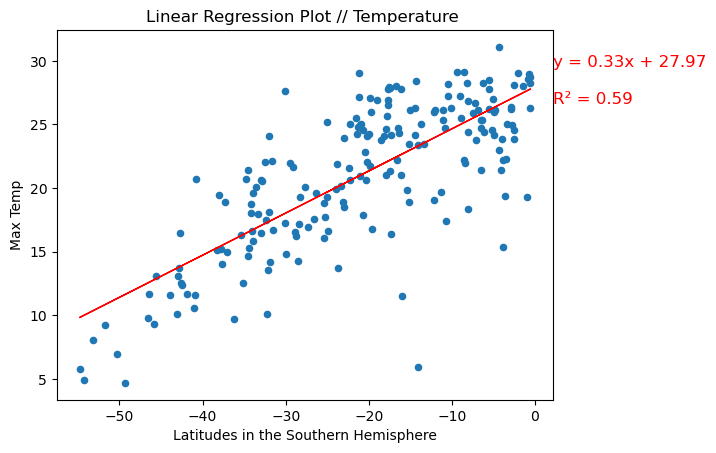

In [214]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Linear Regression Plot // Temperature ', 'Latitudes in the Southern Hemisphere', 'Max Temp')

    
**Discussion about the linear relationship:**
> The Southern Hemisphere has less clustering of temperatures, outside of the tropical zones. \
> The northern Hemisphere gets a lot colder the further north you go, however this logic is not reflected in the southern hemisphere - where the temperatures don't reach the negatives. 



### Humidity vs. Latitude Linear Regression Plot

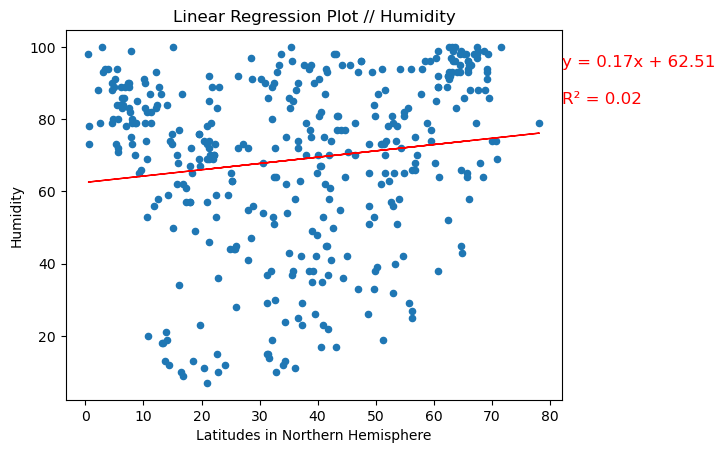

In [215]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Linear Regression Plot // Humidity', 'Latitudes in Northern Hemisphere', 'Humidity')

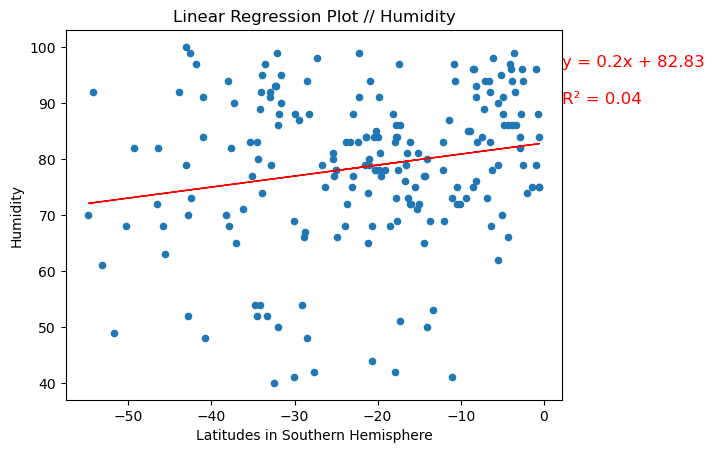

In [216]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Linear Regression Plot // Humidity', 'Latitudes in Southern Hemisphere', 'Humidity')

**Discussion about the linear relationship:**
> of the cities in this study, there are significantly more cities with comfortable humidity 55% or under in the northern hemisphere than in the southern. There isn't really a correlation between latitudes and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

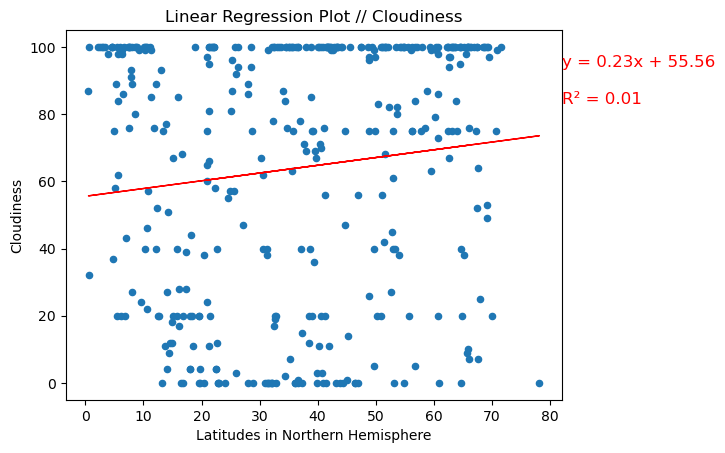

In [218]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Linear Regression Plot // Cloudiness', 'Latitudes in Northern Hemisphere', 'Cloudiness')

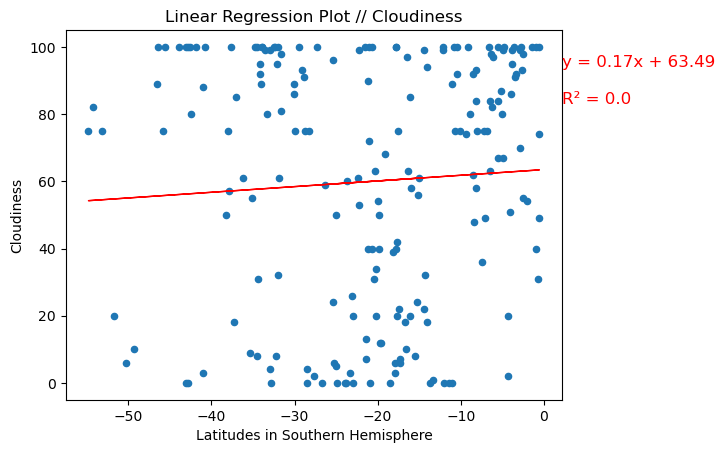

In [217]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Linear Regression Plot // Cloudiness', 'Latitudes in Southern Hemisphere', 'Cloudiness')

**Discussion about the linear relationship:** 
> The Northern Hemisphere cities tend to be more overcast than the sourthern hemisphere cities selected. 

### Wind Speed vs. Latitude Linear Regression Plot

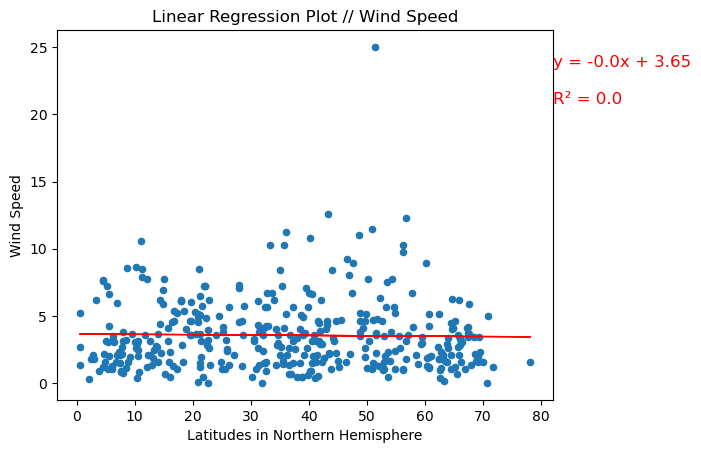

In [219]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Linear Regression Plot // Wind Speed', 'Latitudes in Northern Hemisphere', 'Wind Speed')

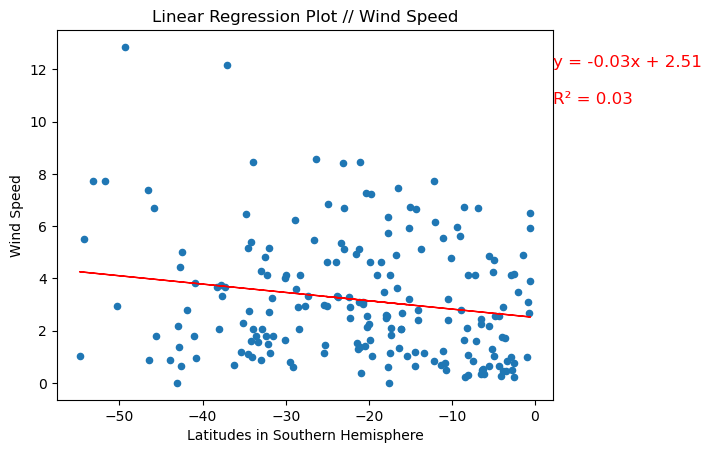

In [220]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Linear Regression Plot // Wind Speed', 'Latitudes in Southern Hemisphere', 'Wind Speed')

**Discussion about the linear relationship:**
> The Northern Hemisphere has more consistent wind speeds, while the southern hemisphere has more variations.

## Exporting Expanding City Database for next step

In [221]:
city_data_df.to_csv("output_data/cities_expanded.csv", index_label="City_ID")